
#                                                                                      **CURSO CIÊNCIA DE DADOS - PROJETO FINAL -NETFLIX-**


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv("NetflixViewingHistory.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) # para mostrar todas as colunas
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df.shape

(311, 2)

In [4]:
df.head()

,Title,Date
0,Dentro da Mente de um Gato,23/08/2022
1,A Estrela de Belém,05/08/2022
2,La Bamba,24/07/2022
3,Arremesso Final: Episódio 3,17/07/2022
4,Arremesso Final: Episódio 2,17/07/2022


In [5]:
df.tail()

,Title,Date
306,Tudo Bem No Natal Que Vem,05/12/2020
307,Explicando - A Mente: Temporada 1: Meditação,05/12/2020
308,Explicando - A Mente: Temporada 1: Ansiedade,05/12/2020
309,Explicando - A Mente: Temporada 1: Sonhos,05/12/2020
310,Explicando - A Mente: Temporada 1: Memória,05/12/2020


## **Copiando Base de Dados para fazer alterações sem comprometer a original**

In [6]:
netflix = df.copy()

# **CONFIGURANDO BASE DE DADOS**

## **Separando a coluna 'Title' em 4 novas colunas**

In [7]:
netflix[['Serie', 'Temporada', 'Episodio', 'Titulo']] = netflix['Title'].str.split(':', n=3,  expand=True)
netflix.columns

Index(['Title', 'Date', 'Serie', 'Temporada', 'Episodio', 'Titulo'], dtype='object')

## **Eliminando espaços embranco entre as palavras**

In [8]:
netflix[['Serie', 'Temporada', 'Episodio', 'Titulo']] = netflix[['Serie', 'Temporada', 'Episodio', 'Titulo']].apply(lambda x: x.str.strip())

## **Criando coluna 'Tipo' e classificando Filmes e Series**

In [9]:
netflix['Tipo'] = netflix['Title'].apply(lambda x: 'Filme' if x.count(':') == 0 else 'Série')

## **Convertendo a coluna 'Date' para datetime no formato brasileiro e criando novas colunas**

In [10]:
netflix["Data"] = pd.to_datetime(netflix["Date"], format="%d/%m/%Y")

# Criando coluna 'Dia'
netflix["Dia"] = netflix["Data"].dt.day.astype(int)

# Traduzindo nomes dos meses para português e criando coluna 'Mes'
meses = {
    "January": "Janeiro",
    "February": "Fevereiro",
    "March": "Março",
    "April": "Abril",
    "May": "Maio",
    "June": "Junho",
    "July": "Julho",
    "August": "Agosto",
    "September": "Setembro",
    "October": "Outubro",
    "November": "Novembro",
    "December": "Dezembro"
}
netflix["Mes"] = netflix["Data"].dt.month_name().map(meses).astype(str)


# Criando a coluna 'Ano'
netflix["Ano"] = netflix["Data"].dt.year.astype(int)

# Traduzindo nomes dos dias da semana para português e criando coluna 'Dia Semana'
dias = {
    "Monday": "Segunda-feira",
    "Tuesday": "Terça-feira",
    "Wednesday": "Quarta-feira",
    "Thursday": "Quinta-feira",
    "Friday": "Sexta-feira",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

netflix["Dia Semana"] = netflix["Data"].dt.day_name().map(dias).sort_values()

## **Excluindo a coluna 'Title, 'Date'**

In [11]:
netflix.drop(columns=['Title', 'Date'], axis=1 ,inplace=True)

## **Criando coluna 'Genero'**

In [12]:
netflix['Genero'] = "NaN"

#Preenchendo a coluna 'Genero'
netflix.loc[netflix['Serie'] == "Dentro da Mente de um Gato", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "A Estrela de Belém", 'Genero'] = "Infantil"
netflix.loc[netflix['Serie'] == "La Bamba", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Arremesso Final", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Stranger Things", 'Genero'] = "Suspense"
netflix.loc[netflix['Serie'] == "Arremessando Alto", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Cobra Kai", 'Genero'] = "Ação"
netflix.loc[netflix['Serie'] == "O Poder e a Lei", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Segunda Guerra em Cores", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Soldado que Não Existiu", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Cirurgiões Inovadores", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "3 Tonelada$", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Winter on Fire", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "De Volta ao Espaço", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "História", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "A Beleza Secreta dos Animais", 'Genero'] = "Documentário "
netflix.loc[netflix['Serie'] == "Bebês em Foco", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Indústria Americana", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Bombardeio", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Getúlio", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "Coded Bias", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Milagres do Paraíso", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Comer Rezar Amar", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Cuba e o Cameraman", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Farol das Orcas", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "A Incrível História da Ilha das Rosas", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Ressurreição", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Imperdoável", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Missa da Meia-Noite", 'Genero'] = "Suspense"
netflix.loc[netflix['Serie'] == "O Céu é de Verdade", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Schumacher", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Chamas do Destino", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Seleção Artificial", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Rotten", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Virgin River", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Klaus", 'Genero'] = "Infantil"
netflix.loc[netflix['Serie'] == "O Resgate dos Desejos de Natal", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Cidade de Gelo", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Andar Montar Rodeio", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Steve Jobs", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "For Life", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Fantasmas do Abismo", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "João de Deus - Cura e Crime", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Irmão do Jorel", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Diagnóstico", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Explicando... Dinheiro", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "A Indústria da Cura", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Explicando", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Código Da Vinci", 'Genero'] = "Suspense"
netflix.loc[netflix['Serie'] == "Milagre na Cela 7", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Nosso Planeta", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Brinquedos que Marcam Época", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Paternidade", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "The Playbook", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Roubos Inacreditáveis", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Como Defender um Assassino", 'Genero'] = "Suspense"
netflix.loc[netflix['Serie'] == "Corpo Humano", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Método Kominsky", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Milagre Azul", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Colcha de Retalhos", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Irmã Dulce", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "A Escavação", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "O Grande Guerreiro Otomano", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Tim Maia", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "Professor Polvo", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Como o Cérebro Cria", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Shtisel", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "The Crown", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Os Salafrários", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Challenger", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "A Vida em Cores com David Attenborough", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Radioactive", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "Trabalho Interno", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Legado Italiano", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Ascensão", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Os Cavaleiros do Zodíaco", 'Genero'] = "Infantil"
netflix.loc[netflix['Serie'] == "Suits", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Quanto Tempo o Tempo Tem", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Cabras da Peste", 'Genero'] = "Comédia";
netflix.loc[netflix['Serie'] == "The Story of Diana", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "The Royal House of Windsor", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Código Bill Gates", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Amor além da vida", 'Genero'] = "Romance"
netflix.loc[netflix['Serie'] == "Kardec", 'Genero'] = "Biografia"
netflix.loc[netflix['Serie'] == "Pai Em Dobro", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "O Dilema das Redes", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Tempestade", 'Genero'] = "Suspense"
netflix.loc[netflix['Serie'] == "Vida Após a Morte", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Bridgertone", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "2020 Nunca Mais", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "O Gambito da Rainha", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Friends", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "O Juiz", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Shrek Bate o Sino", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Tudo Bem No Natal Que Vem", 'Genero'] = "Comédia"
netflix.loc[netflix['Serie'] == "Explicando - A Mente", 'Genero'] = "Documentário"
netflix.loc[netflix['Episodio'] == "Embalos De SáBado À Tarde"	, 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "Mc Juju", 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "A Vida Secreta Dos Belezitos"	, 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "Então É Natal", 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "Acampamento Brutal", 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "A Fantástica Fábrica De Refrigerantes", 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "Excursão Alucinante Sem Freio", 'Genero'] = "Infantil"
netflix.loc[netflix['Episodio'] == "Carlos Felino Conselheiro Amoroso", 'Genero'] = "Infantil"
netflix.loc[netflix['Serie'] == "Trabalho interno", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "E a Vida Continua", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Os Dez Mandamentos - O Filme", 'Genero'] = "Drama"
netflix.loc[netflix['Serie'] == "Andar Montar Rodeio - A Virada de Amberley", 'Genero'] = "Drama"
netflix.loc[netflix['Titulo'] == "Uma nova esperança", 'Genero'] = "Documentário"
netflix.loc[netflix['Titulo'] == "Herdeiro por direito", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Enola Holmes", 'Genero'] = "Ação"
netflix.loc[netflix['Serie'] == "100 Humanos", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "Raul, o Início, o Fim e o Meio", 'Genero'] = "Documentário"
netflix.loc[netflix['Serie'] == "O Tigre Branco", 'Genero'] = "Drama"
netflix.loc[netflix['Episodio'] == "Depois da tempestade", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Um oceano de distância", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Farfalhar", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "O duque e eu", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Questão de honra", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "A arte de desfalecer", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Choque e deleite", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Diamante raro", 'Genero'] = "Romance"
netflix.loc[netflix['Episodio'] == "Disponível", 'Genero'] = "Comédia"
netflix.loc[netflix['Episodio'] == "Contas a pagar", 'Genero'] = "Comédia"
netflix.loc[netflix['Episodio'] == "Vamos voltar", 'Genero'] = "Comédia"
netflix.loc[netflix['Episodio'] == "Peru e Equador", 'Genero'] = "Comédia"
netflix.loc[netflix['Episodio'] == "Venezuela e Colômbia", 'Genero'] = "Comédia"


In [13]:
netflix["Genero"] = netflix["Genero"].str.strip().str.title()

In [14]:
netflix.head(20)

,Serie,Temporada,Episodio,Titulo,Tipo,Data,Dia,Mes,Ano,Dia Semana,Genero
0,Dentro da Mente de um Gato,None,None,None,Filme,2022-08-23,23,Agosto,2022,Terça-feira,Documentário
1,A Estrela de Belém,None,None,None,Filme,2022-08-05,5,Agosto,2022,Sexta-feira,Infantil
2,La Bamba,None,None,None,Filme,2022-07-24,24,Julho,2022,Domingo,Drama
3,Arremesso Final,Episódio 3,None,None,Série,2022-07-17,17,Julho,2022,Domingo,Documentário
4,Arremesso Final,Episódio 2,None,None,Série,2022-07-17,17,Julho,2022,Domingo,Documentário
5,Arremesso Final,Episódio 1,None,None,Série,2022-07-17,17,Julho,2022,Domingo,Documentário
6,Arremesso Final,Episódio 4,None,None,Série,2022-07-17,17,Julho,2022,Domingo,Documentário
7,Stranger Things,Stranger Things 4,Capítulo um,O Clube Hellfire,Série,2022-07-08,8,Julho,2022,Sexta-feira,Suspense
8,Stranger Things,Capítulo um,O desaparecimento de Will Byers,None,Série,2022-07-08,8,Julho,2022,Sexta-feira,Suspense
9,Arremessando Alto,None,None,None,Filme,2022-07-02,2,Julho,2022,Sábado,Drama


In [15]:
netflix.tail()

,Serie,Temporada,Episodio,Titulo,Tipo,Data,Dia,Mes,Ano,Dia Semana,Genero
306,Tudo Bem No Natal Que Vem,None,None,None,Filme,2020-12-05,5,Dezembro,2020,Sábado,Comédia
307,Explicando - A Mente,Temporada 1,Meditação,None,Série,2020-12-05,5,Dezembro,2020,Sábado,Documentário
308,Explicando - A Mente,Temporada 1,Ansiedade,None,Série,2020-12-05,5,Dezembro,2020,Sábado,Documentário
309,Explicando - A Mente,Temporada 1,Sonhos,None,Série,2020-12-05,5,Dezembro,2020,Sábado,Documentário
310,Explicando - A Mente,Temporada 1,Memória,None,Série,2020-12-05,5,Dezembro,2020,Sábado,Documentário


In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Serie       311 non-null    object        
 1   Temporada   257 non-null    object        
 2   Episodio    211 non-null    object        
 3   Titulo      21 non-null     object        
 4   Tipo        311 non-null    object        
 5   Data        311 non-null    datetime64[ns]
 6   Dia         311 non-null    int64         
 7   Mes         311 non-null    object        
 8   Ano         311 non-null    int64         
 9   Dia Semana  311 non-null    object        
 10  Genero      311 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 26.9+ KB


In [17]:
netflix.shape

(311, 11)

In [18]:
netflix.isnull().sum()

Serie           0
Temporada      54
Episodio      100
Titulo        290
Tipo            0
Data            0
Dia             0
Mes             0
Ano             0
Dia Semana      0
Genero          0
dtype: int64

In [19]:
netflix.duplicated().sum()

np.int64(0)


# **1. Quantos títulos da netflix que você assiste são filmes e quantos são séries?**


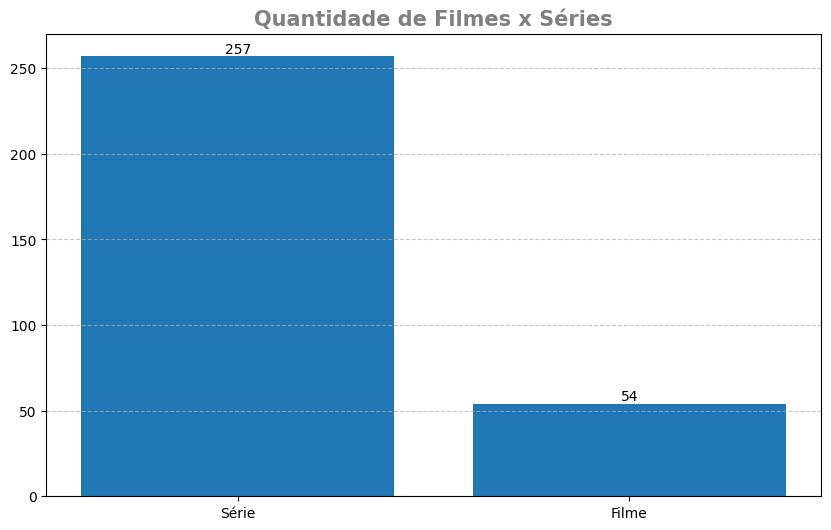

In [20]:
# Conta quantos Filmes e Séries existem e atribui a variável 'contagem'
contagem = netflix["Tipo"].value_counts()

# Gera o gráfico de barras
plt.figure(figsize=(10,6)) # tamanho da figura
plt.bar(contagem.index, contagem.values) # gráfico de barras

# Personalizando o gráfico
plt.title("Quantidade de Filmes x Séries", weight='bold', fontsize=15, color='gray')
#plt.xlabel("Tipo", fontsize=10, color='gray')
#plt.ylabel("Quantidade", fontsize=10, color='gray')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.bar_label(plt.gca().containers[0], fontsize=10, color='black') # adiciona rótulos de dados
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

# **2. Qual dia da semana você mais assiste netflix e qual você vê menos? E qual a porcentagem?**

Dia mais assistido: Domingo (37.3%)
Dia menos assistido: Segunda-feira (1.61%)


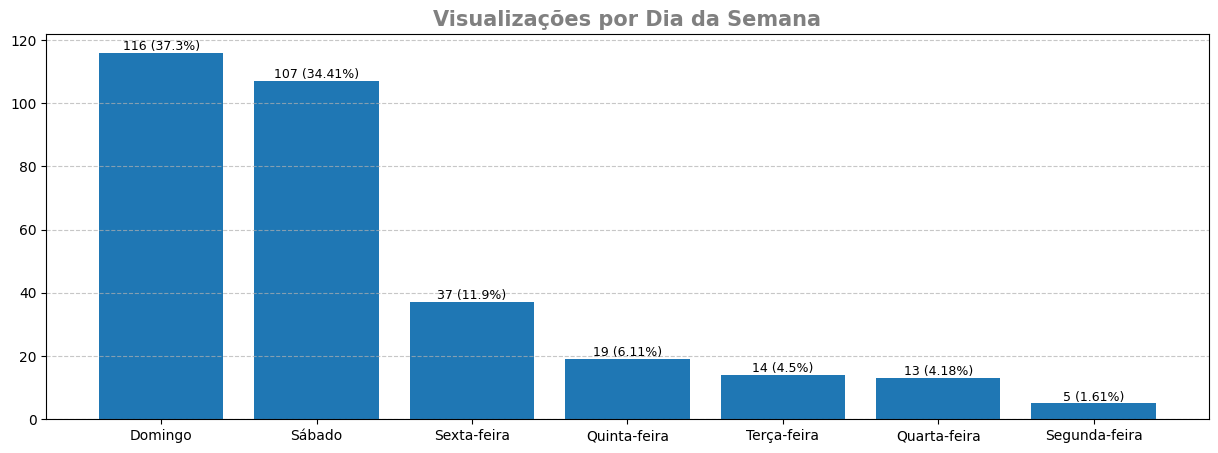

In [21]:
# Conta visualizações por dia da semana
dia_counts = netflix["Dia Semana"].value_counts()

# Identifica o dia mais e menos assistido
dia_mais = dia_counts.idxmax()
dia_menos = dia_counts.idxmin()

# Calcula as porcentagens
pct = (dia_counts / dia_counts.sum() * 100).round(2)
dia_mais_pct = pct.loc[dia_mais] # porcentagem do dia mais assistido
dia_menos_pct = pct.loc[dia_menos] # porcentagem do dia menos assistido

# Exibe os resultados
print("Dia mais assistido:", dia_mais, f"({dia_mais_pct}%)")
print("Dia menos assistido:", dia_menos, f"({dia_menos_pct}%)")

# Gráfico de barras com percentuais
plt.figure(figsize=(15,5))
bars = plt.bar(dia_counts.index, dia_counts.values)
plt.bar_label(bars, labels=[f"{v} ({p}%)" for v, p in zip(dia_counts.values, pct)], fontsize=9)
plt.title("Visualizações por Dia da Semana", weight='bold', fontsize=15, color='gray')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Os dados sugerem que o usuário costuma assistir mais Netflix nos finais de semana, especialmente no domingo.

## 2.1 - Consumo por gênero ao longo dos dias da semana.

In [22]:
# Agrupar e contar visualizações
consumo_dia_genero = netflix.groupby(["Dia Semana", "Genero"]).size().unstack(fill_value=0)

# Reordenar os dias da semana
ordem_dias = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
consumo_dia_genero = consumo_dia_genero.reindex(ordem_dias)
consumo_dia_genero

Genero,Ação,Biografia,Comédia,Documentário,Drama,Infantil,Romance,Suspense
Dia Semana,,,,,,,,
Segunda-feira,3,0,0,0,1,0,0,1
Terça-feira,0,2,0,2,10,0,0,0
Quarta-feira,0,1,0,3,7,0,0,2
Quinta-feira,0,1,5,3,6,3,0,1
Sexta-feira,7,0,2,8,15,1,0,4
Sábado,14,1,4,52,33,0,1,2
Domingo,3,1,10,39,43,9,8,3



# **3. Qual é o número de dias do início ao fim da visualização de cada série?**


In [23]:
# Filtra apenas os registros do tipo "Série"
series = netflix[netflix['Tipo'] == 'Série'].copy()

# Agrupa por série e calcular a diferença entre a data máxima e mínima
duracao_series = series.groupby('Serie')['Data'].agg(['min', 'max'])
duracao_series['N° Dias'] = (duracao_series['max'] - duracao_series['min']).dt.days



print("Número de dias entre o início e fim da visualização de cada série são:")
print(duracao_series[['N° Dias']].sort_values (by='N° Dias', ascending=False))

Número de dias entre o início e fim da visualização de cada série são:
                                        N° Dias
Serie                                          
História                                    420
Cobra Kai                                   343
Bebês em Foco                               232
Nosso Planeta                               183
A Indústria da Cura                         182
Explicando                                  169
The Crown                                   105
Virgin River                                 60
3 Tonelada$                                  50
The Royal House of Windsor                   36
O Gambito da Rainha                          27
O Poder e a Lei                              12
Seleção Artificial                            8
Missa da Meia-Noite                           6
João de Deus - Cura e Crime                   4
Chamas do Destino                             3
The Story of Diana                            1
Diagnóstico      

As demais séries foram assistidas em um único dia.


# **4. Quais são os gêneros de conteúdo mais assistidos?**

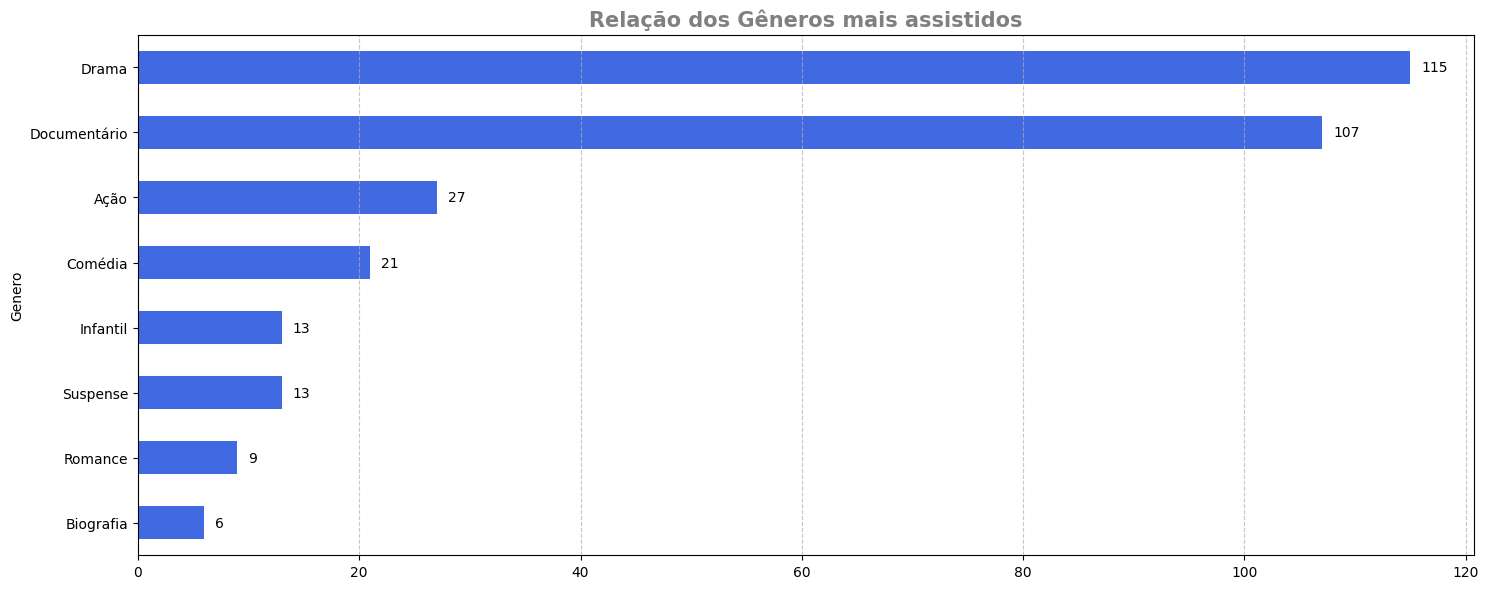

In [24]:
# Conta os gêneros mais assistidos
genero_counts = netflix["Genero"].value_counts().sort_values()


# Cria gráfico de barras horizontal
plt.figure(figsize=(15, 6))
ax = genero_counts.plot(kind='barh', color='royalblue')
plt.title("Relação dos Gêneros mais assistidos", weight='bold', fontsize=15, color='gray')
#plt.xlabel("Número de Visualizações")
#plt.ylabel("Genero")
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis="x", linestyle="--", alpha=0.7) # grade apenas no eixo x
plt.tight_layout()

# Adiciona rótulos de dados de forma simples
for i, v in enumerate(genero_counts): # enumerate retorna o índice e o valor
    ax.text(v + 1, i, str(v), va='center')


plt.show()


# **5. Qual é a série mais assistida em cada mês?**

In [25]:
# Contar quantas vezes cada série foi assistida por mês
mais_assistidas = (netflix.groupby(["Serie", "Mes", "Ano"]).size().reset_index(name="Visualizações"))

# Selecionar a série com mais visualizações em cada mês
top_mes = (mais_assistidas.sort_values(by="Visualizações", ascending=False).drop_duplicates(subset=["Mes"]))

print(top_mes)

               Serie        Mes   Ano  Visualizações
109        The Crown  Fevereiro  2021             14
29         Cobra Kai      Abril  2022             12
122     Virgin River    Outubro  2021             11
121     Virgin River     Agosto  2021             10
123     Virgin River   Setembro  2021              9
22        Bridgerton    Janeiro  2021              8
112        The Crown      Março  2021              8
30         Cobra Kai      Julho  2021              7
32         Cobra Kai       Maio  2022              6
52           Friends   Dezembro  2020              6
83   O Poder e a Lei      Junho  2022              5


# **6. Qual é a quantidade de episódio visto por série?**

In [26]:
serie_ep = netflix[netflix['Tipo'] == 'Série']

# Contar quantos episódios foram vistos por série
episodios_por_serie = serie_ep["Serie"].value_counts().reset_index()
episodios_por_serie.columns = ["Episodio", "Qtd_Episodios"]


episodios_por_serie

,Episodio,Qtd_Episodios
0,The Crown,40
1,Virgin River,30
2,Cobra Kai,26
3,Irmão do Jorel,8
4,Bridgerton,8
5,Chamas do Destino,8
6,Missa da Meia-Noite,7
7,O Gambito da Rainha,7
8,Bebês em Foco,6
9,História,6



# **7. Qual é o número médio de títulos assistidos por mês por usuário?**

In [27]:

# Contar títulos por mês
titulos_por_mes = netflix.groupby("Mes").size() # conta quantos títulos foram assistidos em cada mês

# Calcular média mensal
media_mensal = titulos_por_mes.mean() # média de títulos assistidos por mês

# Estimativa fictícia de usuários (substitua pelo número real se disponível)
usuarios_por_mes = 1  # exemplo fictício
media_por_usuario = round(media_mensal / usuarios_por_mes)


print(titulos_por_mes)
print(f"Média de títulos assistidos por mês (Geral): {media_por_usuario:.0f} títulos/mês")

Mes
Abril        33
Agosto       36
Dezembro     18
Fevereiro    37
Janeiro      41
Julho        34
Junho        15
Maio         17
Março        27
Outubro      35
Setembro     18
dtype: int64
Média de títulos assistidos por mês (Geral): 28 títulos/mês



# **8. Qual é o dia/semana/mês com mais visualizações?**


## **Visualizações por Dia**

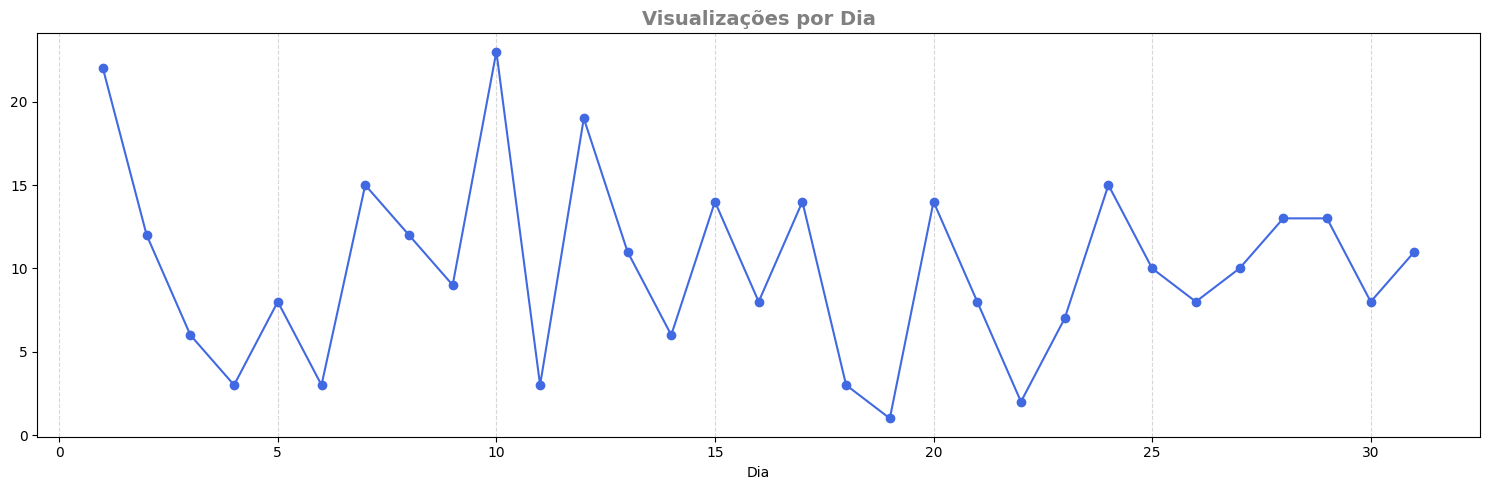

In [28]:
''# Contar visualizações por dia
visualizacoes_dia = netflix["Dia"].value_counts().sort_index()

# Gráfico de linha
plt.figure(figsize=(15, 5))
visualizacoes_dia.plot(kind='line', color='royalblue', marker='o')

plt.title("Visualizações por Dia", fontsize=14, weight='bold', color='gray')
#plt.xlabel("Data")
#plt.ylabel("Quantidade de Visualizações")
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout() # evita sobreposições, como rótulos de eixos, títulos e legendas

plt.show()

In [29]:
print(visualizacoes_dia.to_list())

[22, 12, 6, 3, 8, 3, 15, 12, 9, 23, 3, 19, 11, 6, 14, 8, 14, 3, 1, 14, 8, 2, 7, 15, 10, 8, 10, 13, 13, 8, 11]


## Visualizações por Semana

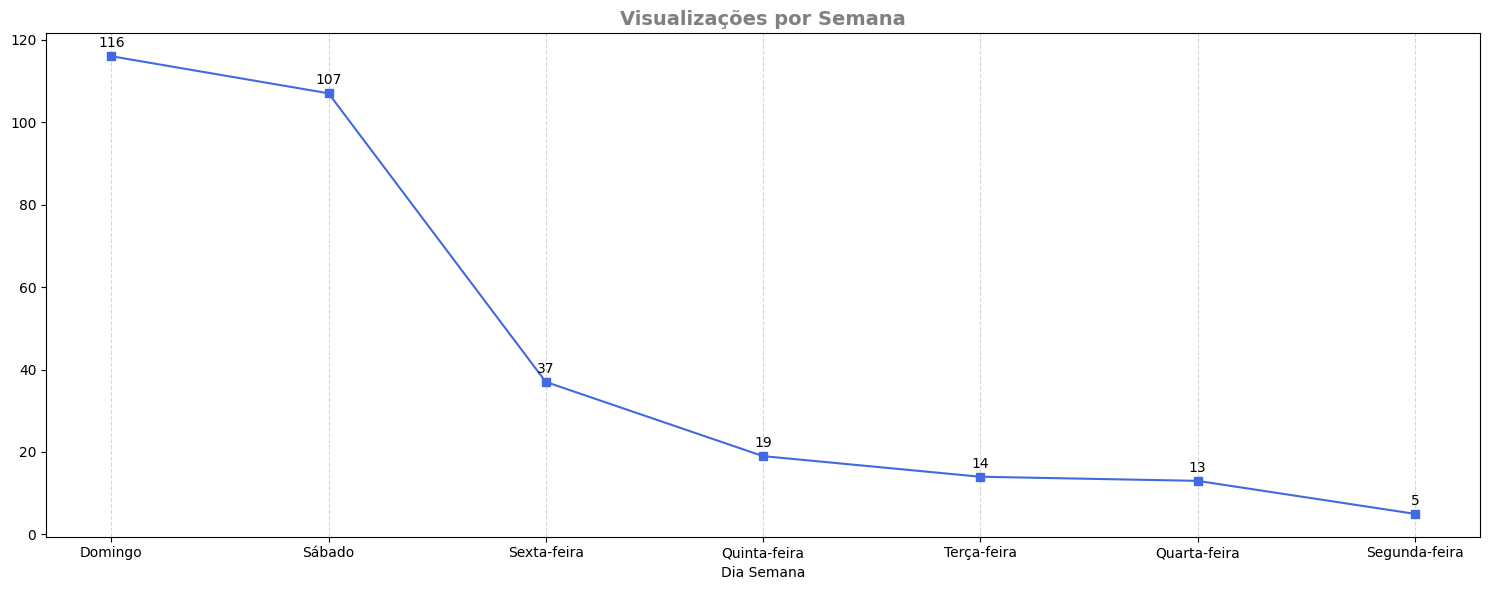

In [30]:
visualizacoes_semana = netflix["Dia Semana"].value_counts()


# Gráfico de linha
plt.figure(figsize=(15, 6))
visualizacoes_semana.plot(kind='line', color='royalblue', marker='s')

plt.title("Visualizações por Semana", fontsize=14, weight='bold', color='gray')
#plt.xlabel("Semana")
#plt.ylabel("Quantidade de Visualizações")
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black') # deixa os números maiores
plt.grid(axis='x', linestyle='--', alpha=0.5) # linha apenas no eixo x
plt.tight_layout() # evita sobreposições, como rótulos de eixos, títulos e legendas

# Adiciona rótulos de dados de forma simples
for i, v in enumerate(visualizacoes_semana):
    plt.text(i, v + 1.5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


## Visualizações por Mês

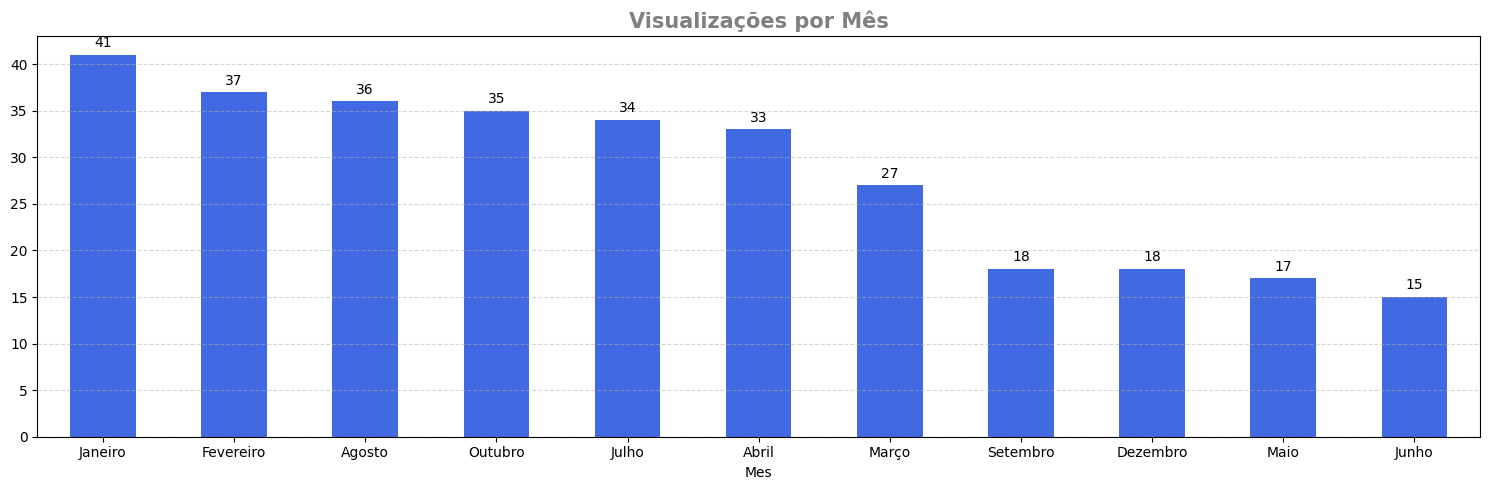

In [31]:
# Contar visualizações por mês
visualizacoes_mes = netflix["Mes"].value_counts()

# Gráfico de barras
plt.figure(figsize=(15, 5))
visualizacoes_mes.plot(kind='bar', color='royalblue')

plt.title("Visualizações por Mês", fontsize=15, weight='bold', color='gray')
#plt.xlabel("Mês")
#plt.ylabel("Quantidade de Visualizações")
plt.xticks(rotation= 0, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Adiciona rótulos de dados de forma simples
for i, v in enumerate(visualizacoes_mes):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)


plt.show()



# **9. Qual é a condição do tempo nos dias de visualização?**


In [32]:
import requests

cidade = "Florianópolis"

# 1) Geocodificar cidade -> lat/lon
geo = requests.get(
    "https://geocoding-api.open-meteo.com/v1/search",
    params={"name": cidade, "count": 1, "language": "pt", "format": "json"}
).json()

lat = geo["results"][0]["latitude"]
lon = geo["results"][0]["longitude"]

# 2) Intervalo de datas da sua base
start = str(netflix["Data"].dt.date.min())
end   = str(netflix["Data"].dt.date.max())

# 3) Clima diário (máx, mín, precipitação e código de tempo)
resp = requests.get(
    "https://archive-api.open-meteo.com/v1/archive",
    params={
        "latitude": lat, "longitude": lon,
        "start_date": start, "end_date": end,
        "daily": ["temperature_2m_max","temperature_2m_min","precipitation_sum","weathercode"],
        "timezone": "auto", "language": "pt"
    }
).json()

clima = pd.DataFrame(resp["daily"])
clima["Data"] = pd.to_datetime(clima["time"])
clima = clima.rename(columns={
    "temperature_2m_min": "tmin",
    "temperature_2m_max": "tmax",
    "precipitation_sum": "prcp"
})

# 4) Mapear weathercode -> descrição
wmap = {
    0:"Céu limpo",
    1:"Parcialmente claro",
    2:"Parcialmente nublado",
    3:"Nublado",
    45:"Névoa",
    48:"Névoa com geada",
    51:"Garoa fraca",
    53:"Garoa moderada",
    55:"Garoa intensa",
    61:"Chuva fraca",
    63:"Chuva moderada",
    65:"Chuva intensa",
    71:"Neve fraca",
    73:"Neve moderada",
    75:"Neve intensa",
    80:"Aguaceiros fracos",
    81:"Aguaceiros moderados",
    82:"Aguaceiros intensos",
    95:"Trovoadas",
    96:"Trovoadas c/ granizo fraco",
    97:"Trovoadas c/ granizo forte"
}
clima["Condicao_Tempo"] = clima["weathercode"].map(wmap).fillna("Desconhecido")

# 5) Junção por dia
netflix["Data_dia"] = netflix["Data"].dt.date
clima["Data_dia"]  = clima["Data"].dt.date

netflix_clima1 = pd.merge(
    netflix,
    clima[["Data_dia","tmin","tmax","prcp","Condicao_Tempo"]],
    on="Data_dia",
    how="left"
).drop(columns=["Data_dia"])

print(netflix_clima1["Condicao_Tempo"].value_counts(dropna=False))

Condicao_Tempo
Garoa fraca             93
Nublado                 71
Chuva moderada          42
Garoa moderada          27
Chuva fraca             27
Garoa intensa           17
Parcialmente nublado    15
Chuva intensa            9
Parcialmente claro       6
Céu limpo                4
Name: count, dtype: int64


## 9.1 - Gêneros mais assistidos em dias chuvosos

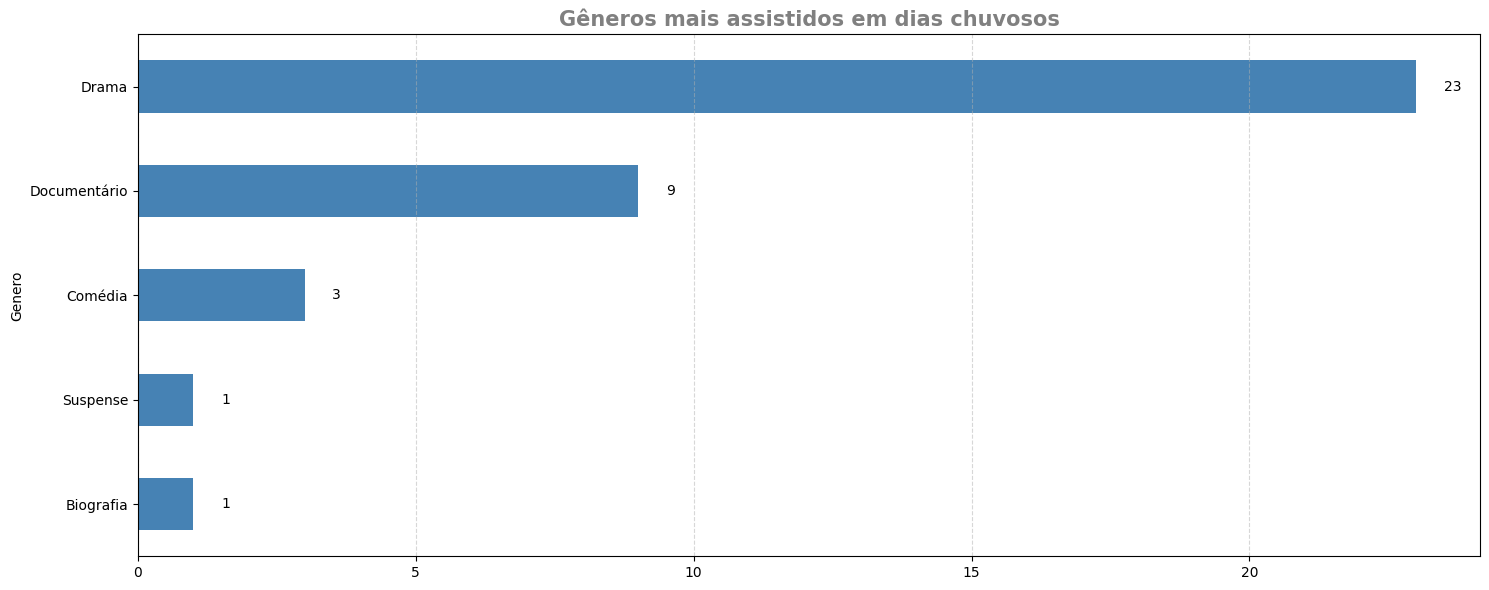

In [33]:
# Filtra os dias com chuva significativa
chuva = netflix_clima1[netflix_clima1["prcp"] > 10] # dias com mais de 5mm de chuva

# Contar gêneros nesses dias
generos_chuva = chuva["Genero"].value_counts().sort_values()

# Gráfico
plt.figure(figsize=(15, 6))
br = generos_chuva.plot(kind='barh', color='steelblue')
plt.title("Gêneros mais assistidos em dias chuvosos", fontsize=15, weight='bold', color='gray')
#plt.xlabel("Visualizações")
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, v in enumerate(generos_chuva):
    br.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()

plt.show()


# **10. Qual é a probabilidade de assistir filme em um feriado?**

🎬 Proporção de filmes em feriados: 7.41%
🎬 Proporção de filmes em dias normais: 18.31%


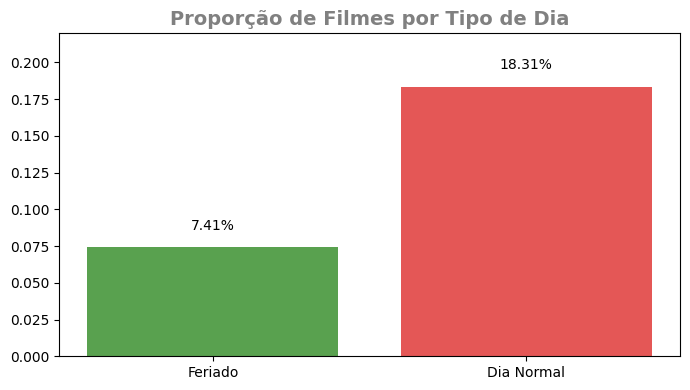

In [34]:
import holidays

# Criar lista de feriados para Brasil (estado SC)
feriados = holidays.Brazil(years=netflix["Data"].dt.year.unique(), prov="SC")

# Criar coluna booleana: True se for feriado
feriados = pd.to_datetime(list(feriados))
netflix["Feriado"] = netflix["Data"].isin(feriados)

# Total de visualizações em feriados
total_feriado = len(netflix[netflix["Feriado"]]) # total de visualizações em feriados

# Total de visualizações em dias normais
total_dia_normal = len(netflix[~netflix["Feriado"]]) # total de visualizações em dias normais

# Filmes em feriados
filmes_feriado = len(netflix[(netflix["Tipo"] == "Filme") & (netflix["Feriado"])])

# Filmes em dias normais
filmes_dia_normal = len(netflix[(netflix["Tipo"] == "Filme") & (~netflix["Feriado"])])

# Proporção de filmes dentro de cada tipo de dia
filmes_feriado = filmes_feriado / total_feriado if total_feriado > 0 else 0
filmes_normal = filmes_dia_normal / total_dia_normal if total_dia_normal > 0 else 0

print(f"🎬 Proporção de filmes em feriados: {filmes_feriado:.2%}")
print(f"🎬 Proporção de filmes em dias normais: {filmes_normal:.2%}")


# Dados para o gráfico
rotulos = ['Feriado', 'Dia Normal'] # rótulos
valores = [filmes_feriado, filmes_normal] # valores

fig, ax = plt.subplots(figsize=(7, 4)) # cria figura e eixo
bars = ax.bar(rotulos, valores, color=['#59A14F', '#E45756'])

ax.set_ylim(0, max(valores) * 1.2 if max(valores) > 0 else 1)
ax.set_title('Proporção de Filmes por Tipo de Dia', fontsize=14, color='gray', weight='bold')

for bar, val in zip(bars, valores):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **11. Qual é a tendência de visualizações ao longo do tempo?**

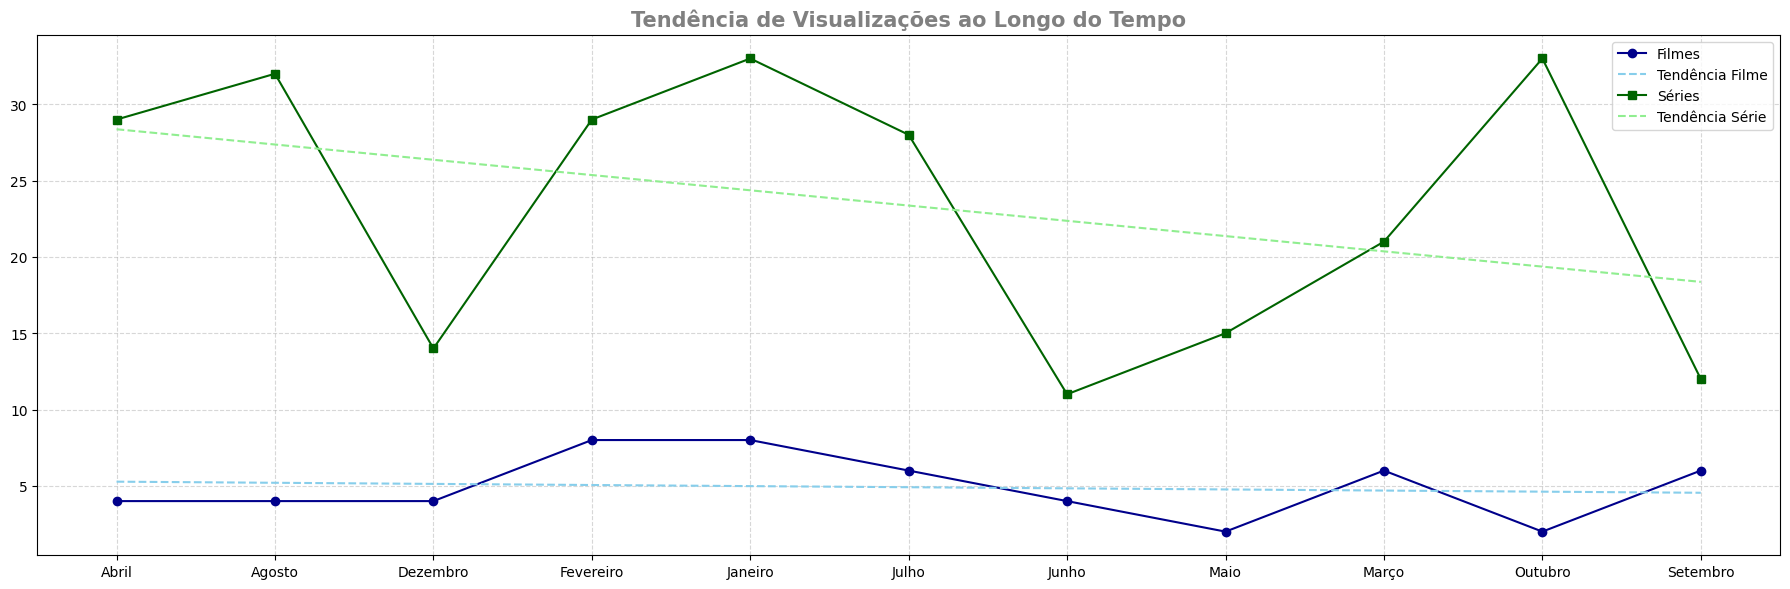

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Contar visualizações por mês e tipo
vis_por_mes_tipo = netflix.groupby(["Mes", "Tipo"]).size().unstack(fill_value=0)

# Transformar meses em números
meses_numericos = np.arange(len(vis_por_mes_tipo)).reshape(-1, 1)

# Filmes
y_filme = vis_por_mes_tipo["Filme"].values
modelo_filme = LinearRegression().fit(meses_numericos, y_filme)
tendencia_filme = modelo_filme.predict(meses_numericos)

# Séries
y_serie = vis_por_mes_tipo["Série"].values
modelo_serie = LinearRegression().fit(meses_numericos, y_serie)
tendencia_serie = modelo_serie.predict(meses_numericos)


# Plotar gráfico com linhas de tendência

plt.figure(figsize=(18, 6))

# Filmes
plt.plot(vis_por_mes_tipo.index.astype(str), y_filme, marker='o', color='darkblue', label='Filmes')
plt.plot(vis_por_mes_tipo.index.astype(str), tendencia_filme, linestyle='--', color='skyblue', label='Tendência Filme')

# Séries
plt.plot(vis_por_mes_tipo.index.astype(str), y_serie, marker='s', color='darkgreen', label='Séries')
plt.plot(vis_por_mes_tipo.index.astype(str), tendencia_serie, linestyle='--', color='lightgreen', label='Tendência Série')

plt.title("Tendência de Visualizações ao Longo do Tempo", fontsize=15, weight='bold', color='gray')

plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() # exibe a legenda
plt.tight_layout()

plt.show()


### **INTERPRETAÇÃO DA LINHA DE TENÊNCIA**

**Tendência negativa nas séries**

A linha de tendência mostra queda de consumo ao longo do tempo que podem ter sido ocasionadas por:
- Saturação de conteúdo: usuários podem ter perdido o interesse ou já consumiram os títulos mais relevantes.
- Mudança de plataforma: migração para outros serviços de streaming ou redes sociais.
- Sazonalidade negativa: meses com menos feriados ou clima mais quente (mais atividades externas).
- Menor engajamento com filmes/séries específicos: talvez o tipo de conteúdo disponível não esteja mais atraindo.


**Tendência relativamente estável nos filmes**

- A linha de tendência é quase horizontal, indicando que o consumo de filmes não cresceu nem caiu significativamente nesse período, o que  sugere que os filmes mantiveram uma base fiel de visualizações, porém não estão em expansão.


In [36]:
netflix.to_csv('netflix_tratado.csv', index=False)